# GlobalAveragePooling (GAP)
- 입력 Feature map의 채널별로 평균값을 추출하여 1 x 1 x channel 의 Feature map을 생성하는 Pooling
- `model.add(keras.layers.GlobalAveragePooling2D())`
![gap01](figures/09_gap_01.png)

- Feature Extraction layer에서 추출한 Feature map을 Classifier layer로 Flatten해서 전달하면 많은 연결노드와 파라미터가 필요하게된다.     
GAP를 사용하면 노드와 파라미터의 개수를 효과적으로 줄일 수 있다.
- Feature map의 채널수가 많을 경우 GAP를 사용하는 것이 효과적이나 채널수가 적다면 Flatten을 사용하는 것이 좋다.


![gap02](figures/09_gap_02.png)

# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.

## Keras에서 제공하는 Pretrained Model 
- tensorflow.keras.applications 패키지를 통해 제공
    - https://www.tensorflow.org/api_docs/python/tf/keras/applications?hl=ko
    - Modules
        - 각 모델 생성 함수와 전처리 함수제공
    - Functions
        - 모델 생성함수 제공
- 모델 생성함수의 주요 매개변수
    - `weights`: 모형의 학습된 weight. 기본값- 'imagenet'
    - `include_top`: fully connected layer를 포함할지 여부. True 포함시킴, False: 포함 안 시킴
    - `input_shape`: 사용자가 입력할 이미지의 크기 shape. 3D 텐서로 지정. (높이, 너비, 채널). 기본값: (224,224,3)
    

> 딥러닝 모델 개발시 대부분 Transfer Learning을 한다.  
> 다양한 분야에서 다양한 네트워크 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
> [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 

## Keras 제공 Pretrain model

In [ ]:
from tensorflow.keras import applications

In [ ]:
vgg16_1 = applications.VGG16(weights='imagenet', # 어떤 데이터셋을 학습한 weight를 받을 것인지 지정
                             include_top=False, # classifier layer를 같이 받을지 여부 [default: True]
                             input_shape=(224, 224, 3)) # 입력 img의 shape을 지정, default

58900480/58889256 [==============================] - 5s 0us/step


In [ ]:
vgg16_1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg16_2 = applications.VGG16(weights='imagenet', 
                             include_top=True,
                             input_shape=(224, 224, 3))

553476096/553467096 [==============================] - 49s 0us/step


In [ ]:
vgg16_2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

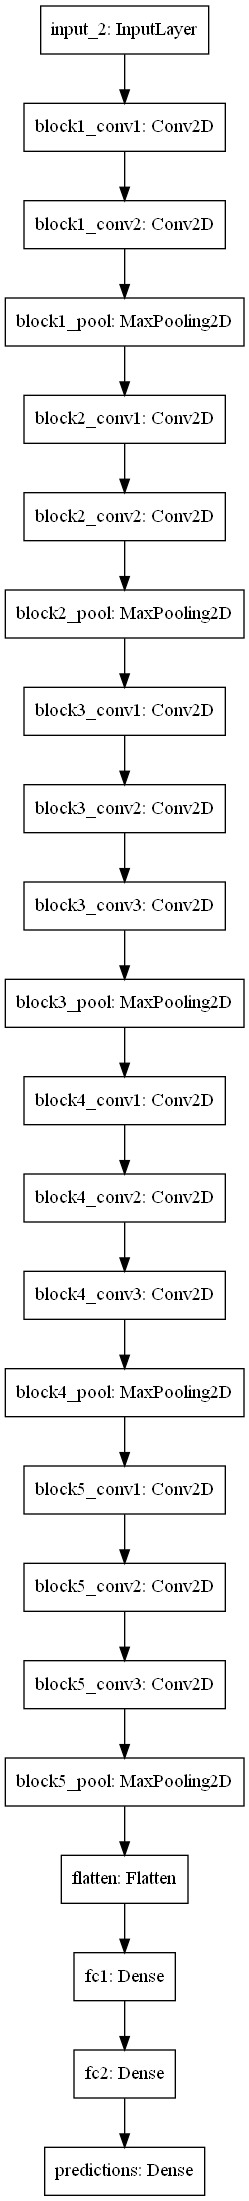

In [ ]:
from tensorflow import keras
keras.utils.plot_model(vgg16_2)

In [ ]:
resnet50 = applications.ResNet50V2(include_top=False, input_shape=(224,224,3))

94683136/94668760 [==============================] - 8s 0us/step


In [ ]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

## VGG16 Pretrained 모델을 이용해 이미지 분류

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import numpy as np

##### Pretrained Model download

In [ ]:
vgg16 = keras.applications.VGG16()
# include_top=True, input_shape=(224,224,3)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

##### 추론한 이미지 로딩

In [ ]:
# img_path = 'test_img/car.jpg'
img_path = 'test_img/bicycle.jpg'

# img loading
img = load_img(img_path, target_size=(224, 224))

# PIL의 img type -> ndarray
img_np = img_to_array(img)
img_np.shape

(224, 224, 3)

##### 전처리

In [ ]:
# 각 모델을 학습하기 전에 실행했던 전처리 방식을 함수로 제공
# 모델이름모듈.preprocess_input() 함수로 제공
input_tensor = keras.applications.vgg16.preprocess_input(img_np)
input_tensor.shape

(224, 224, 3)

##### 추론

In [ ]:
pred = vgg16.predict(input_tensor[np.newaxis, ...])
pred.max(), np.argmax(pred), pred.shape

(0.959451, 671, (1, 1000))

In [ ]:
# 1000개의 index를 실제 label명을 변환해주는 함수
from keras.applications.imagenet_utils import decode_predictions

label = np.argmax(pred, axis=-1)
label_class = decode_predictions(pred, top=3) # [[tuple (label id, label name, probability)]]
# 모델이 추론한 확률값들
# top=N: 상위 N개 반환

print("label num:", label[0])
for idx, lc in enumerate(label_class[0], start=1):
    print(f'{idx}. {lc[1]} ({lc[2]})')

label num: 671
1. mountain_bike (0.9594510197639465)
2. unicycle (0.015243877656757832)
3. crash_helmet (0.00717397965490818)


In [ ]:
label_class

[[('n03792782', 'mountain_bike', 0.959451),
  ('n04509417', 'unicycle', 0.015243878),
  ('n03127747', 'crash_helmet', 0.0071739797)]]

# Transfer learning (전이학습)

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 현재 하려는 예측 문제를 해결한다.
- 보통 전체 네트워크에서 Feature Extraction 부분을 사용한다.
    - Vision의 경우 입력 영상에서 Bottom Layer인 Convolution Layer들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 정의한뒤 그 둘을 합쳐서 구성한 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
    -  **Layer.trainable=False**, **Model.trainable=False**

#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

##### 이미지 다운로드

In [1]:
import gdown
import os
from zipfile import ZipFile
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU
To: /content/cats_and_dogs_small.zip
100%|██████████| 90.8M/90.8M [00:00<00:00, 233MB/s]


'cats_and_dogs_small.zip'

In [2]:
ZipFile(fname).extractall(os.path.join('data','cats_and_dogs_small'))

##### import

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

##### 하이퍼파라미터 설정

In [4]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

##### Util 함수 정의
##### 추론함수

In [10]:
def predict_cat_dog(img_path, model, preprocess_input):
    """
    이미지를 받아서 모델을 이용해 추론 후 결과를 반환하는 함수
    [파라미터]
        img_path: str - 분류(추론)할 이미지 경로
        model: 학습된 모델 객체
        preprocess_input: 이미지 전처리 함수
        model: conv_base(convolution)을 통해 feature를 추출할지 여부
    [반환값]
        tuple: (예측확률, 예측라벨 index, 예측라벨명)
    """
    class_names = ['Cat', 'Dog'] # index: class, 값: class name
    img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE)) # 받은 경로의 이미지 읽기
    img_np = img_to_array(img) # img -> ndarray
    img_np = img_np[np.newaxis, ...] # batch (개수) 축 추가
    
    input_tensor = preprocess_input(img_np) # 입력 이미지 전처리

    pred = model.predict(input_tensor)[0][0] # 추론
    pred_class = int(np.where(pred<=0.5, 0, 1)) # class
    pred_label = class_names[pred_class] # class name
    
    return pred, pred_class, pred_label

##### ImageDataGenerator 를 생성하는 함수

In [11]:
def get_generator(preprocess_input):
    """
    train/validation/test 용 ImageDataGenerator 생성해서 반환하는 함수
    [파라미터]
        preprocess_input: 전처리 함수
    [반환값]
        tuple: (train iter, validation iter, test iter)
    """
    train_dir = "data/cats_and_dogs_small/train/"
    val_dir = 'data/cats_and_dogs_small/validation/'
    test_dir = 'data/cats_and_dogs_small/test'
    
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                       rotation_range=40, 
                                       brightness_range=[0.7, 1.3], 
                                       zoom_range=0.2, 
                                       horizontal_flip=True, 
                                       width_shift_range=0.2, 
                                       height_shift_range=0.2, 
                                       fill_mode='constant')
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    
    train_iter = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    val_iter = val_datagen.flow_from_directory(val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    test_iter = test_datagen.flow_from_directory(test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    
    return train_iter, val_iter, test_iter

##### train/validation/test 데이터셋 로드

In [12]:
# vgg16 모델의 전처리함수(preprocess_input)을 전달해서 iterator 생성
train_iter, val_iter, test_iter = get_generator(applications.vgg16.preprocess_input)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
train_iter.class_indices

{'cats': 0, 'dogs': 1}

##### 모델정의

In [12]:
def create_model1(backbone):
    """
    Feature Exctractor 모델을 받아서 개/고양이 분류 모델을 만들어 반환
    [Parameter]
        backbone: Feature Exctractor
    [Return]
        model
    """
    model = keras.Sequential()
    
    backbone.trainable = False # Frozen: backbone을 구성하는 모든 layer들의 weight들은 학습 때 업데이트 X
    # trainable = False => 모델 compile 전에 처리해야 적용된다
    model.add(backbone)  # 모델에 backbone을 추가(쌓기)
    # model.add(layer), model.add(다른 model - layers)
    
    model.add(layers.GlobalAveragePooling2D()) # Flatten() 대신에 GAP사용
    model.add(layers.Dense(units=1, activation='sigmoid'))
    
    return model

In [13]:
backbone = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
model1 = create_model1(backbone)

model1.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


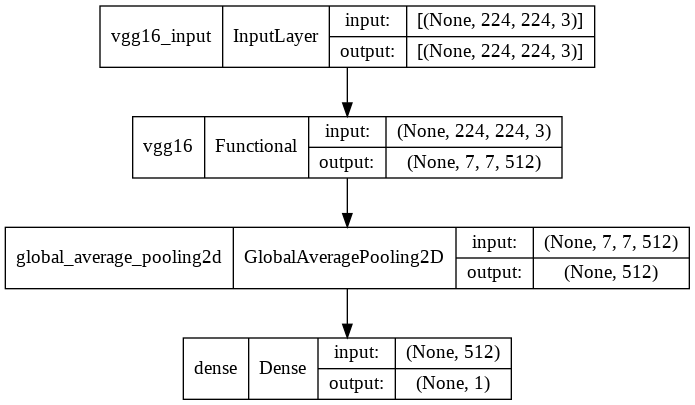

In [15]:
keras.utils.plot_model(model1, show_shapes=True)

##### 학습

In [17]:
# ImageDataGenerator 사용해서 feeding시 steps_per_epoch, validation_steps를 지정해야함
# steps_per_epoch: train set의 1epoch당 step수
# validation_steps: validation set의 1epoch당 step수
hist = model1.fit(train_iter, epochs=10, 
                   steps_per_epoch=len(train_iter),
                   validation_data=val_iter,
                   validation_steps=len(val_iter))

Epoch 1/10
20/20 [==============================] - 43s 2s/step - loss: 0.3417 - accuracy: 0.8830 - val_loss: 0.3146 - val_accuracy: 0.9070
Epoch 2/10
20/20 [==============================] - 42s 2s/step - loss: 0.2662 - accuracy: 0.9030 - val_loss: 0.2781 - val_accuracy: 0.9170
Epoch 3/10
20/20 [==============================] - 42s 2s/step - loss: 0.2382 - accuracy: 0.9140 - val_loss: 0.2655 - val_accuracy: 0.9200
Epoch 4/10
20/20 [==============================] - 44s 2s/step - loss: 0.2055 - accuracy: 0.9230 - val_loss: 0.2341 - val_accuracy: 0.9280
Epoch 5/10
20/20 [==============================] - 44s 2s/step - loss: 0.1793 - accuracy: 0.9340 - val_loss: 0.2084 - val_accuracy: 0.9320
Epoch 6/10
20/20 [==============================] - 42s 2s/step - loss: 0.1706 - accuracy: 0.9350 - val_loss: 0.2063 - val_accuracy: 0.9360
Epoch 7/10
20/20 [==============================] - 44s 2s/step - loss: 0.1513 - accuracy: 0.9450 - val_loss: 0.1624 - val_accuracy: 0.9490
Epoch 8/10
20/20 [==

##### 평가

In [18]:
model1.evaluate(test_iter)

10/10 [==============================] - 9s 815ms/step - loss: 0.1503 - accuracy: 0.9550


[0.1503465324640274, 0.9549999833106995]

##### 새로운 데이터 추론

In [19]:
predict_cat_dog('cat.jpg', model1, applications.vgg16.preprocess_input) 

(2.974502e-11, 0, 'Cat')

In [20]:
predict_cat_dog('dog.jpg', model1, applications.vgg16.preprocess_input)

(1.0, 1, 'Dog')

## Fine-tuning(미세조정)
- Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)에 재학습시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 train한다.**

1. **<font size='5'>전체 모델을 전부 학습시킨다.(1번)</font>**
    - Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
    - 학습에 시간이 많이 걸린다.
    
    
2. **<font size='5'>Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
    - **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
3. **<font size='5'>Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**
    - **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> custom dataset: 내가 학습시키고자 하는 dataset 

## Model, Layer의 weight 조회

### Model에서 Layer들 조회
- model객체.layers
    - 모델을 구성하는 layer 객체들을 담은 리스트
- model객체.get_layer(Layer이름:str)
    - argument로 전달한 이름의 Layer객체를 반환
    

### Model과 Layer의 weight들 조회 및 설정
- Layer와 Model은 **Weight 조회**와 관련해 세가지 **속성**을 제공
    - **weights:** 레이어의 모든 weight 변수들을 담은 리스트
        - get_weights() : 레이어의 모든 weight 변수 리스트를 카피해서 반환한다.
    - **trainable_weights:** Train(학습)시 업데이트 되는 weights들 리스트
    - **non_trainable_weights:** Train(학습)시 업데이트 되지 않는(훈련되지 않는) weights들 리스트
- Layer와 Model은 boolean 값을 가지는 속성 **`trainable`**을 제공
    - trainable을 **False로** 설정하면 Layer의 weights들이 훈련가능에서 **훈련 불가능** 상태로 변경된다. 이런 상태를 **Frozen-동결** 이라고 하며 학습시 weight들이 업데이트 되지 않는다.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

test_model = keras.Sequential()
test_model.add(layers.Conv2D(filters=32, kernel_size=3,  padding='same', activation='relu', input_shape=(28,28,1)))
test_model.add(layers.MaxPooling2D(padding='same'))

test_model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
test_model.add(layers.MaxPooling2D(padding='same'))

test_model.add(layers.Flatten())
test_model.add(layers.Dense(units=128, activation='relu'))
test_model.add(layers.Dense(units=1, activation='sigmoid', name='output'))


In [2]:
test_model.summary() # Frozen되면 trainable parameter => non-trainable param.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
output (Dense)               (None, 1)                 1

In [3]:
test_layers = test_model.layers # 모델을 구성하는 모든 Layer객체들을 리스트로 반환
print(type(test_layers), len(test_layers))

<class 'list'> 7


In [4]:
test_layers[0], test_layers[1], test_layers[6], test_layers[4]

(<keras.layers.convolutional.Conv2D at 0x1e672e98910>,
 <keras.layers.core.Flatten at 0x1e621652d90>)

In [5]:
test_layers[0].name, test_layers[6].name

('conv2d', 'output')

In [6]:
# 모델에서 이름으로 특정 layer객체를 조회
output_layer = test_model.get_layer("output")
output_layer

In [7]:
conv_layer_1 = test_model.get_layer('conv2d')
conv_layer_1

In [8]:
max_pooling2d_1 = test_model.get_layer('max_pooling2d_1')
max_pooling2d_1

In [9]:
# 모델 내의 모든 weights (파라미터 - weight, bias) 들을 layer 단위로 조회
model_params = test_model.weights
type(model_params), len(model_params)

(list, 8)

In [10]:
model_params[0].numpy().shape

(3, 3, 1, 32)

In [11]:
# 특정 layer의 weights들을 조회
param = conv_layer_1.weights

type(param), len(param) # 0: weight, 1: bias

(list, 2)

In [12]:
param[0].shape 

TensorShape([3, 3, 1, 32])

In [13]:
param[1].shape 

TensorShape([32])

In [14]:
# weights들이 없는 경우
max_pooling2d_1.weights

[]

In [15]:
print(conv_layer_1.trainable)
conv_layer_1.trainable = False
print(conv_layer_1.trainable) 

True
False


In [16]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
output (Dense)               (None, 1)                 1

### Fine Tuning 예제

#### Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습

- Conv_base에서 가장 Top부분에 있는 레이어에 대해 fine-tuning.
    - 앞의 layer들은 비교적 일반적이고 재사용 가능한 feature를 학습
    - 너무 많은 parameter를 학습시키면 overfitting의 위험이 있음 (특히 새로운 데이터의 수가 적을 때)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

##### 하이퍼파라미터 

In [6]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

##### 모델 정의, 컴파일

In [7]:
def create_model2():
    """
    VGG16에서 block5_conv2, block5_conv3 은 학습 가능하도록 fine tuning을 한다.
    """
    model = keras.Sequential()
    conv_base = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    is_trainable = False
    for layer in conv_base.layers: # conv_base 모델을 구성하는 모든 레이어들을 조회 -> 반복문
        if layer.name == 'block5_conv2': # block5_conv2 이름의 레이어일 때 trainable을 True 그전에는 False로 설정
            is_trainable = True
        layer.trainable = is_trainable
    
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    return model

In [8]:
model2 = create_model2()
model2.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 14,846,273
Trainable params: 4,851,201
Non-trainable params: 9,995,072
_________________________________________________________________


##### callback 설정
- 모델 저장

In [ ]:
save_path = 'path'

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_path, save_best_only=True, monitor='val_loss', verbose=2)

##### 학습

In [14]:
hist = model2.fit(train_iter, 
                   epochs=N_EPOCHS, 
                   steps_per_epoch=len(train_iter), 
                   validation_data=val_iter, 
                   validation_steps=len(val_iter), 
                  #  callbacks=[mc_callback]
                  )

Epoch 1/20
20/20 [==============================] - 80s 2s/step - loss: 6.7095 - accuracy: 0.5900 - val_loss: 0.4067 - val_accuracy: 0.8180
Epoch 2/20
20/20 [==============================] - 44s 2s/step - loss: 0.5820 - accuracy: 0.7460 - val_loss: 0.2237 - val_accuracy: 0.9200
Epoch 3/20
20/20 [==============================] - 43s 2s/step - loss: 0.2115 - accuracy: 0.9245 - val_loss: 0.1766 - val_accuracy: 0.9450
Epoch 4/20
20/20 [==============================] - 43s 2s/step - loss: 0.1864 - accuracy: 0.9290 - val_loss: 0.2435 - val_accuracy: 0.9190
Epoch 5/20
20/20 [==============================] - 43s 2s/step - loss: 0.1209 - accuracy: 0.9525 - val_loss: 0.1039 - val_accuracy: 0.9690
Epoch 6/20
20/20 [==============================] - 43s 2s/step - loss: 0.0969 - accuracy: 0.9620 - val_loss: 0.2411 - val_accuracy: 0.9310
Epoch 7/20
20/20 [==============================] - 43s 2s/step - loss: 0.1150 - accuracy: 0.9570 - val_loss: 0.0872 - val_accuracy: 0.9730
Epoch 8/20
20/20 [==

##### 결과 시각화

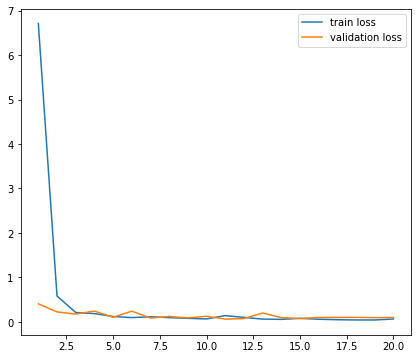

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')

plt.legend()
plt.show()

##### 최종 평가

In [16]:
model2.evaluate(test_iter)

10/10 [==============================] - 8s 799ms/step - loss: 0.0896 - accuracy: 0.9690


[0.08963651210069656, 0.968999981880188]